# How to code and visualize the k-means algorithm

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import imageio
import os

%matplotlib inline

N_POINTS = 150
N_CLUSTERS = 5
COLORS = ["red", "blue", "green", "brown", "purple"]

## Point class representing a 2D point

In [2]:
class Point:
    
    def __init__(self, x, y, color="grey", magnitude=20):
        self.x = x
        self.y = y
        self.color = color
        self.magnitude = magnitude
        
    def distance_to_point(self, point):
        delta_x = self.x - point.x
        delta_y = self.y - point.y
        return math.sqrt(delta_x**2+delta_y**2)
    
    def __repr__(self):
        return f'({self.x} | {self.y})'

## Point list to save several points and run some basic methods on

In [3]:
class PointList:
    
    def __init__(self, points:[Point]=None, marker="x"):
        if points:
            self.points = points
        else:
            self.points = []
        self.marker = marker
    
    def x_values(self):
        return [point.x for point in self.points]
    
    def y_values(self):
        return [point.y for point in self.points]
    
    def colors(self):
        return [point.color for point in self.points]
    
    def marker(self):
        return [point.marker for point in self.points]
    
    def magnitudes(self):
        return [point.magnitude for point in self.points]
        
    def plot(self):
        return plt.scatter(self.x_values(), self.y_values(), color=self.colors(), marker=self.marker, s=self.magnitudes(), label="Iteration")
    
    def append(self, point):
        self.points.append(point)
        
    def len(self):
        return len(self.points)
    
    def x_sum(self):
        return sum([point.x for point in self.points])
    
    def y_sum(self):
        return sum([point.y for point in self.points])
    
    def x_avg(self):
        return self.x_sum()/self.len()
    
    def y_avg(self):
        return self.y_sum()/self.len()
    
    def difference(self, points):
        return sum([own_point.x - list_point.x+ own_point.y - list_point.y for own_point, list_point in zip(self.points, points.points)])

## Numpy method to generate random points with x and y coordinates and an optional color

In [4]:
def random_point(**kwargs):
    x = np.random.rand(1)
    y = np.random.rand(1)
    return Point(x, y, **kwargs)

In [5]:
def random_points(n):
    points = [random_point() for _ in range(n)]
    return PointList(points)

## Create random points and plot them

In [6]:
points = random_points(N_POINTS)

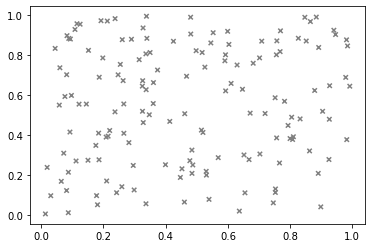

In [7]:
points.plot()
plt.show()

## Method to create k-times random cluster centres

In [8]:
def cluster_centres(k, colors):
    centres = list()
    for color in colors:
        centres.append(random_point(color=color, magnitude=150))
    centres = PointList(centres, marker="*")
    return centres

## Create random Centres

In [9]:
centres = cluster_centres(k=N_CLUSTERS, colors=COLORS)

## Plot points and centres

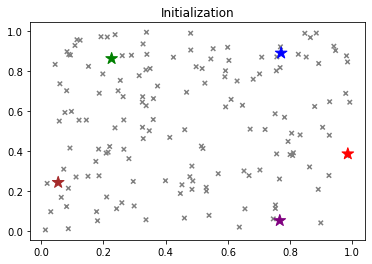

In [10]:
frames = list()

points.plot()
centres.plot()
plt.title("Initialization")
filename =os.path.join(os.getcwd(), "animation", f"frame0.png")
plt.savefig(filename)

frames.append(filename)

plt.show()

## Cluster points based on their euclidean distance to a centre

In [11]:
def cluster_points(points, centres):
    points =  points.points
    centres = centres.points
    clusters = list([PointList() for _ in range(len(centres))]) # Create k lists
    for point in points:
        distances = [point.distance_to_point(centre) for centre in centres]
        min_distance = min(distances)
        centre_index = distances.index(min_distance)
        centre = centres[centre_index]
        clusters[centre_index].append(point)
        point.color = centre.color
    return clusters

## Calculate mid of clusters

In [12]:
def calculate_new_centres(clusters):
    new_centres = PointList(marker="*")
    for cluster in clusters:
        x_avg = cluster.x_avg()
        y_avg = cluster.y_avg()
        new_centres.append(Point(x=x_avg, y=y_avg, color=cluster.colors()[0], magnitude=150))
    return new_centres

## Testing

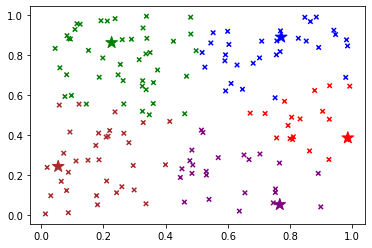

In [13]:
clusters = cluster_points(points, centres)
points.plot()
centres.plot()
plt.show()

# The actual Algorithm

In [14]:
epsilon = 0.1E-19
difference = 1
n = 1

while abs(difference) >= abs(0 + epsilon):
    new_clusters = cluster_points(points, centres)
    new_centres = calculate_new_centres(new_clusters)
    difference = new_centres.difference(centres)
    
    # Animation
    points.plot()
    centres.plot()
    plt.title(f'Iteration {n}')
    filename =os.path.join(os.getcwd(), "animation", f"frame{n}.png")
    plt.savefig(filename)
    frames.append(filename)
    plt.close()
    # /Animation
    
    centres = new_centres
    n+=1

## Create Animation from frames

In [15]:
with imageio.get_writer('animation/animation.gif', mode='I', duration=1) as writer:
    for frame in frames:
        image = imageio.imread(frame)
        writer.append_data(image)
    